# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Dataset

In [3]:
from sklearn import datasets

wine = datasets.load_wine()

wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [4]:
df = pd.DataFrame(wine.data,columns=wine.feature_names)

In [5]:
df["quality"] = pd.DataFrame(wine.target)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


# Data Exploration

In [6]:
## Checking Nulls

df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
quality                         0
dtype: int64

In [11]:
df.shape

(178, 14)

In [7]:
## Checking Duplicates

df.duplicated().sum()

0

In [8]:
df.quality.value_counts()

1    71
0    59
2    48
Name: quality, dtype: int64

# Univariate Analysis

### Distribution Plots

Feature:  alcohol


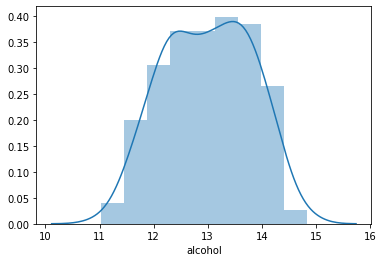

-----------------------------------------------------------------------------------------------------------------------------
Feature:  malic_acid


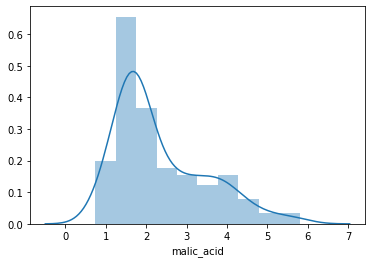

-----------------------------------------------------------------------------------------------------------------------------
Feature:  ash


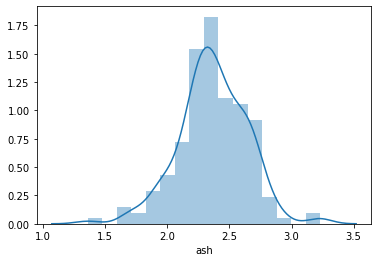

-----------------------------------------------------------------------------------------------------------------------------
Feature:  alcalinity_of_ash


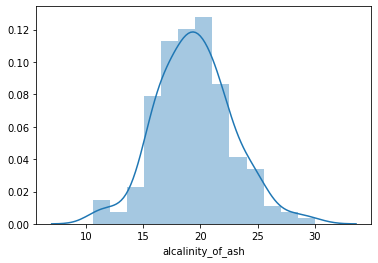

-----------------------------------------------------------------------------------------------------------------------------
Feature:  magnesium


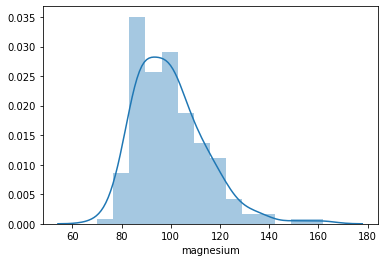

-----------------------------------------------------------------------------------------------------------------------------
Feature:  total_phenols


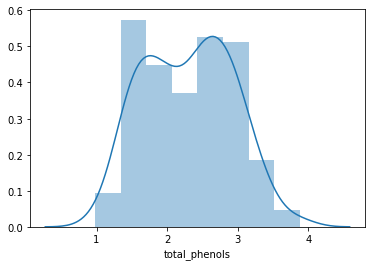

-----------------------------------------------------------------------------------------------------------------------------
Feature:  flavanoids


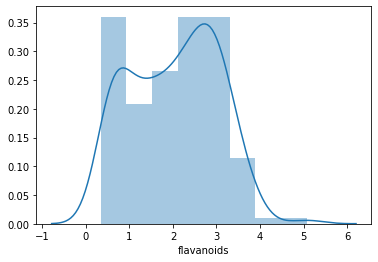

-----------------------------------------------------------------------------------------------------------------------------
Feature:  nonflavanoid_phenols


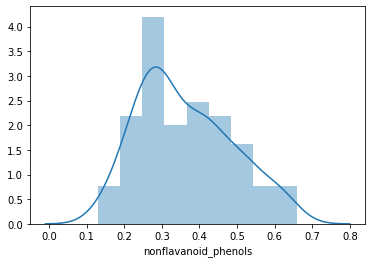

-----------------------------------------------------------------------------------------------------------------------------
Feature:  proanthocyanins


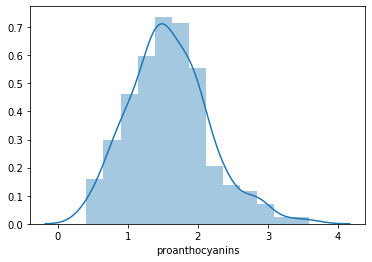

-----------------------------------------------------------------------------------------------------------------------------
Feature:  color_intensity


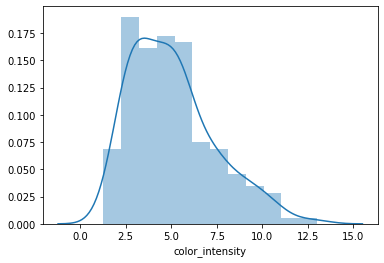

-----------------------------------------------------------------------------------------------------------------------------
Feature:  hue


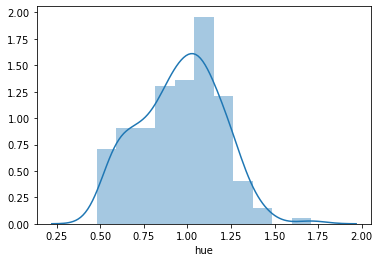

-----------------------------------------------------------------------------------------------------------------------------
Feature:  od280/od315_of_diluted_wines


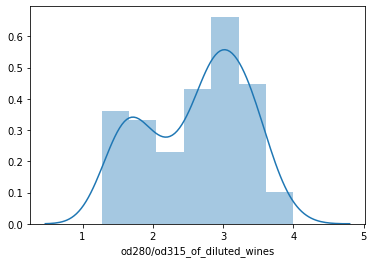

-----------------------------------------------------------------------------------------------------------------------------
Feature:  proline


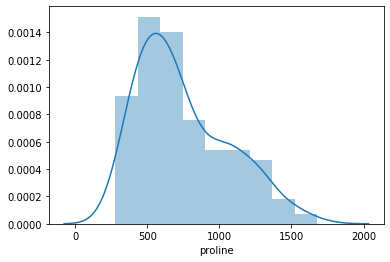

-----------------------------------------------------------------------------------------------------------------------------


In [9]:
for col in df.iloc[:,:-1].columns:
    print("Feature: ", col)
    sns.distplot(df[col])
    plt.show()
    print("-"*125)

### Boxplots

Feature:  alcohol


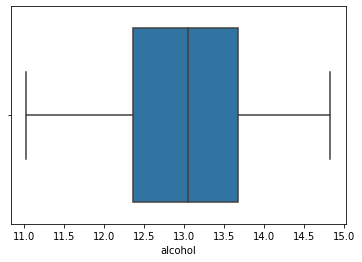

-----------------------------------------------------------------------------------------------------------------------------
Feature:  malic_acid


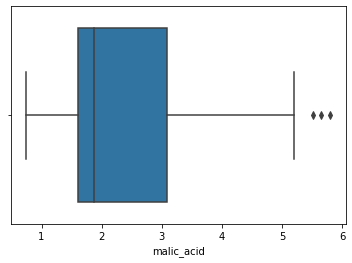

-----------------------------------------------------------------------------------------------------------------------------
Feature:  ash


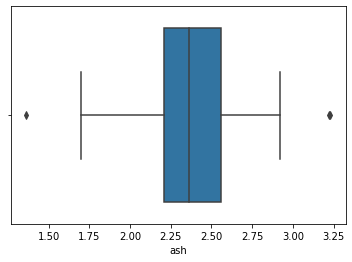

-----------------------------------------------------------------------------------------------------------------------------
Feature:  alcalinity_of_ash


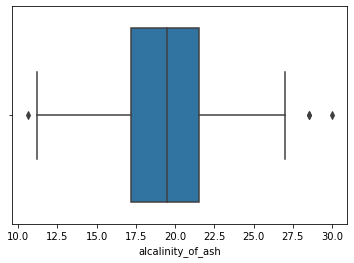

-----------------------------------------------------------------------------------------------------------------------------
Feature:  magnesium


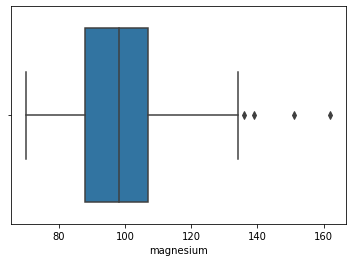

-----------------------------------------------------------------------------------------------------------------------------
Feature:  total_phenols


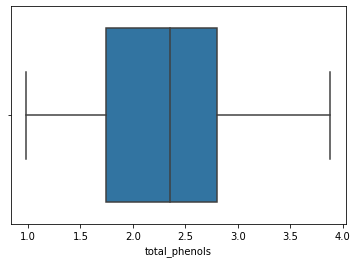

-----------------------------------------------------------------------------------------------------------------------------
Feature:  flavanoids


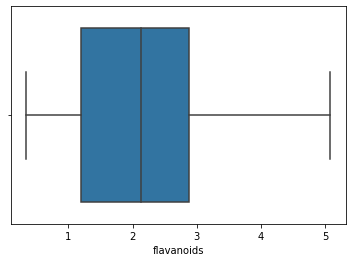

-----------------------------------------------------------------------------------------------------------------------------
Feature:  nonflavanoid_phenols


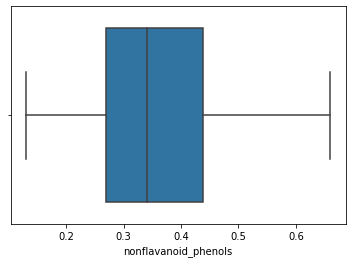

-----------------------------------------------------------------------------------------------------------------------------
Feature:  proanthocyanins


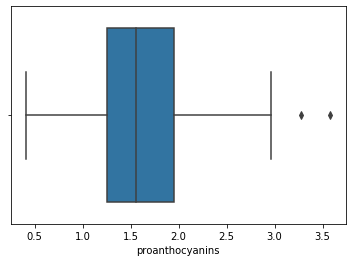

-----------------------------------------------------------------------------------------------------------------------------
Feature:  color_intensity


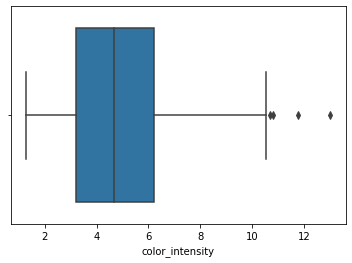

-----------------------------------------------------------------------------------------------------------------------------
Feature:  hue


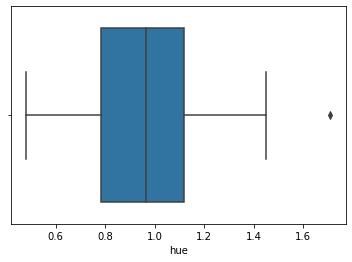

-----------------------------------------------------------------------------------------------------------------------------
Feature:  od280/od315_of_diluted_wines


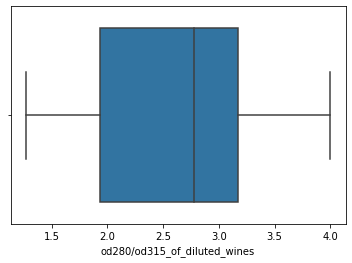

-----------------------------------------------------------------------------------------------------------------------------
Feature:  proline


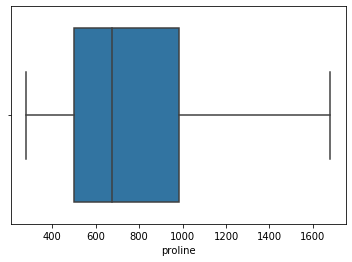

-----------------------------------------------------------------------------------------------------------------------------


In [12]:
for col in df.iloc[:,:-1].columns:
    print("Feature: ", col)
    sns.boxplot(df[col])
    plt.show()
    print("-"*125)

### Outlier Treatment

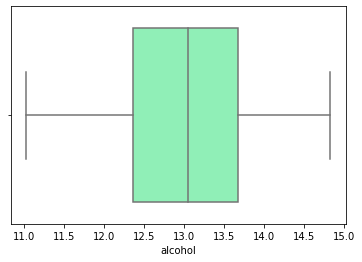

**************************************************************************************************** 




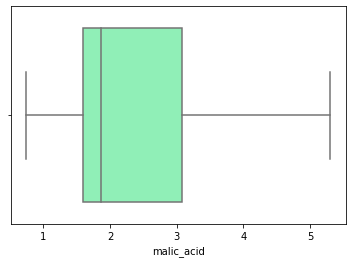

**************************************************************************************************** 




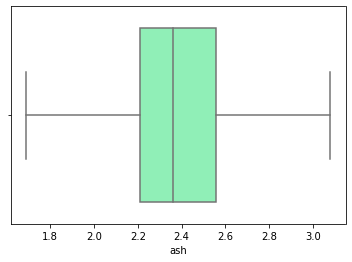

**************************************************************************************************** 




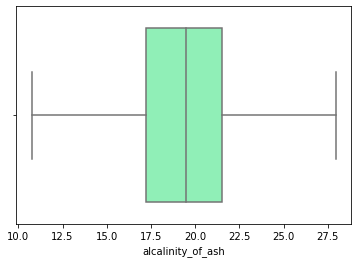

**************************************************************************************************** 




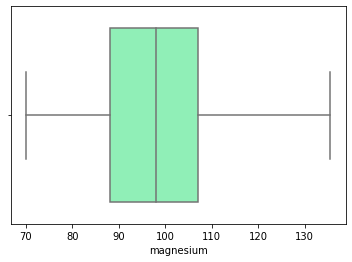

**************************************************************************************************** 




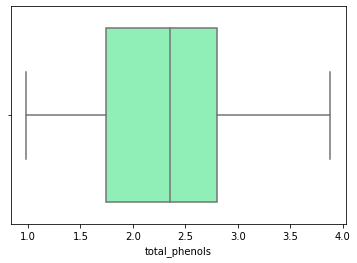

**************************************************************************************************** 




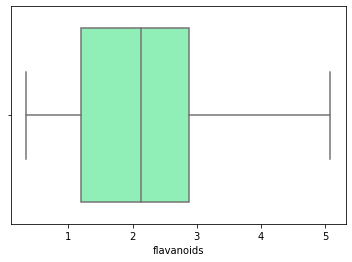

**************************************************************************************************** 




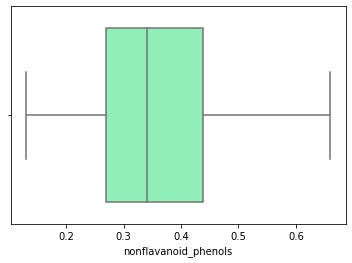

**************************************************************************************************** 




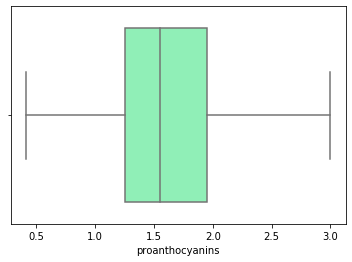

**************************************************************************************************** 




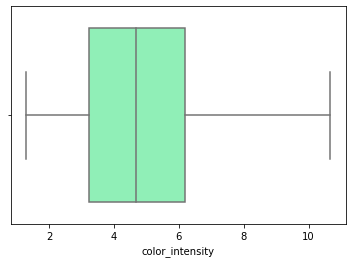

**************************************************************************************************** 




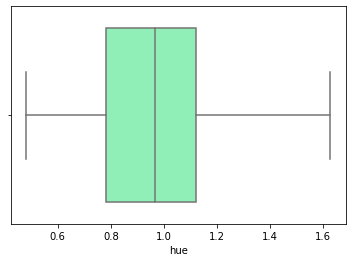

**************************************************************************************************** 




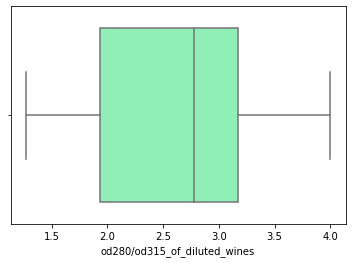

**************************************************************************************************** 




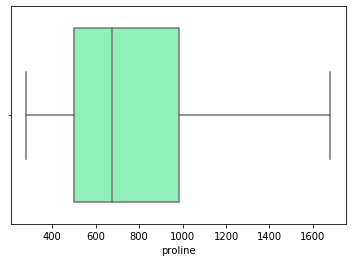

**************************************************************************************************** 




In [13]:
for col in df.iloc[:, :-1].columns:
    if df[col].dtype != object:
        
        q1, q3 = np.percentile(df[col], [25,75])
        
        iqr = q3-q1
        lower_fence = q1 - (1.5 * iqr)
        upper_fence = q3 + (1.5 * iqr)
        
        df[col] = df[col].apply(lambda x: upper_fence if x > upper_fence else lower_fence if x< lower_fence else x)
        sns.boxplot(x = df[col], data= df, palette='rainbow', orient='h')
        plt.show()
        print('*'*100, '\n'*2)

### Checking Distribution of Target

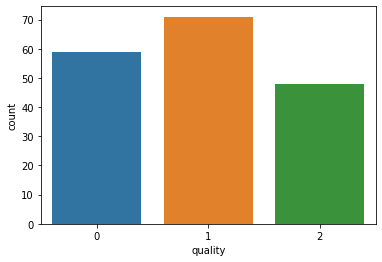

In [14]:
sns.countplot(df["quality"])

# Bivariate Analysis

### Barplots of Variables wrt Target 

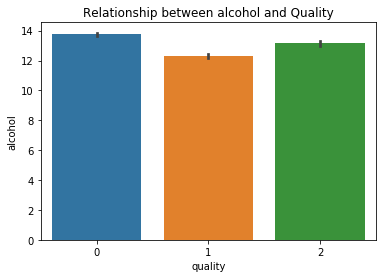

*****************************************************************************************************************************


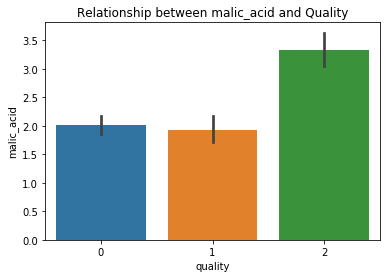

*****************************************************************************************************************************


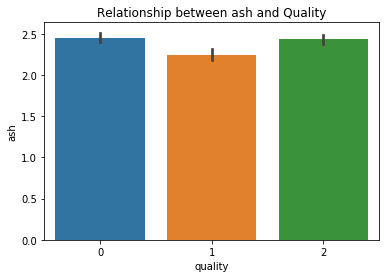

*****************************************************************************************************************************


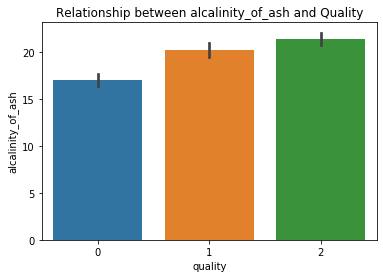

*****************************************************************************************************************************


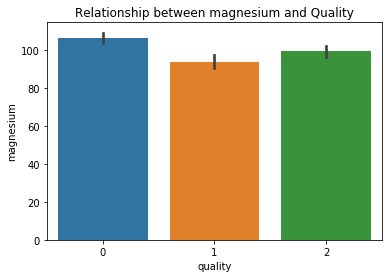

*****************************************************************************************************************************


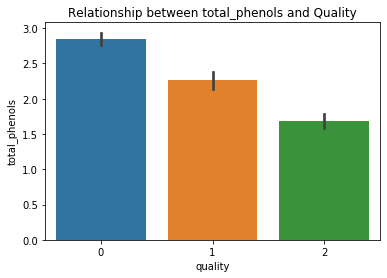

*****************************************************************************************************************************


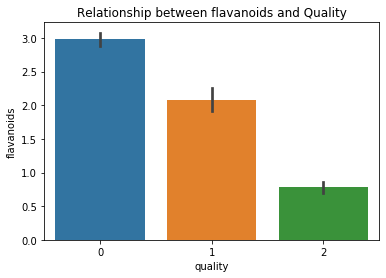

*****************************************************************************************************************************


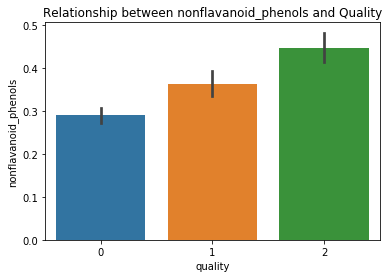

*****************************************************************************************************************************


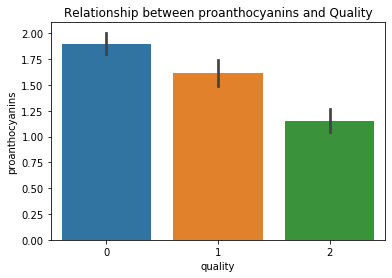

*****************************************************************************************************************************


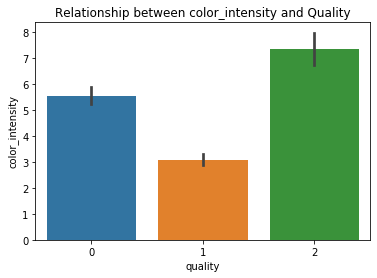

*****************************************************************************************************************************


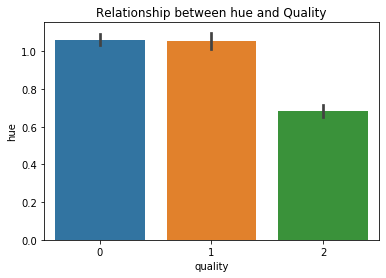

*****************************************************************************************************************************


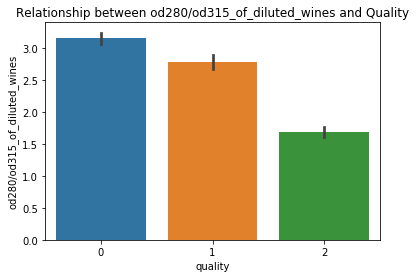

*****************************************************************************************************************************


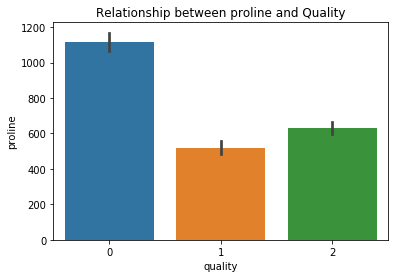

*****************************************************************************************************************************


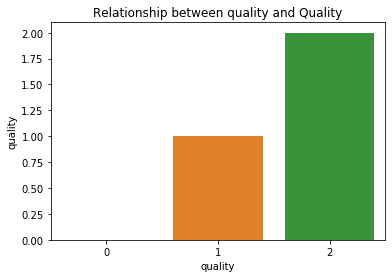

*****************************************************************************************************************************


In [15]:
for col in df.columns:
    if df[col].dtype!= object:
        sns.barplot(x = 'quality',
                   y = df[col],
                   data = df)
        
        plt.title("Relationship between {} and Quality".format(col))
        plt.show()
        print("*"*125)

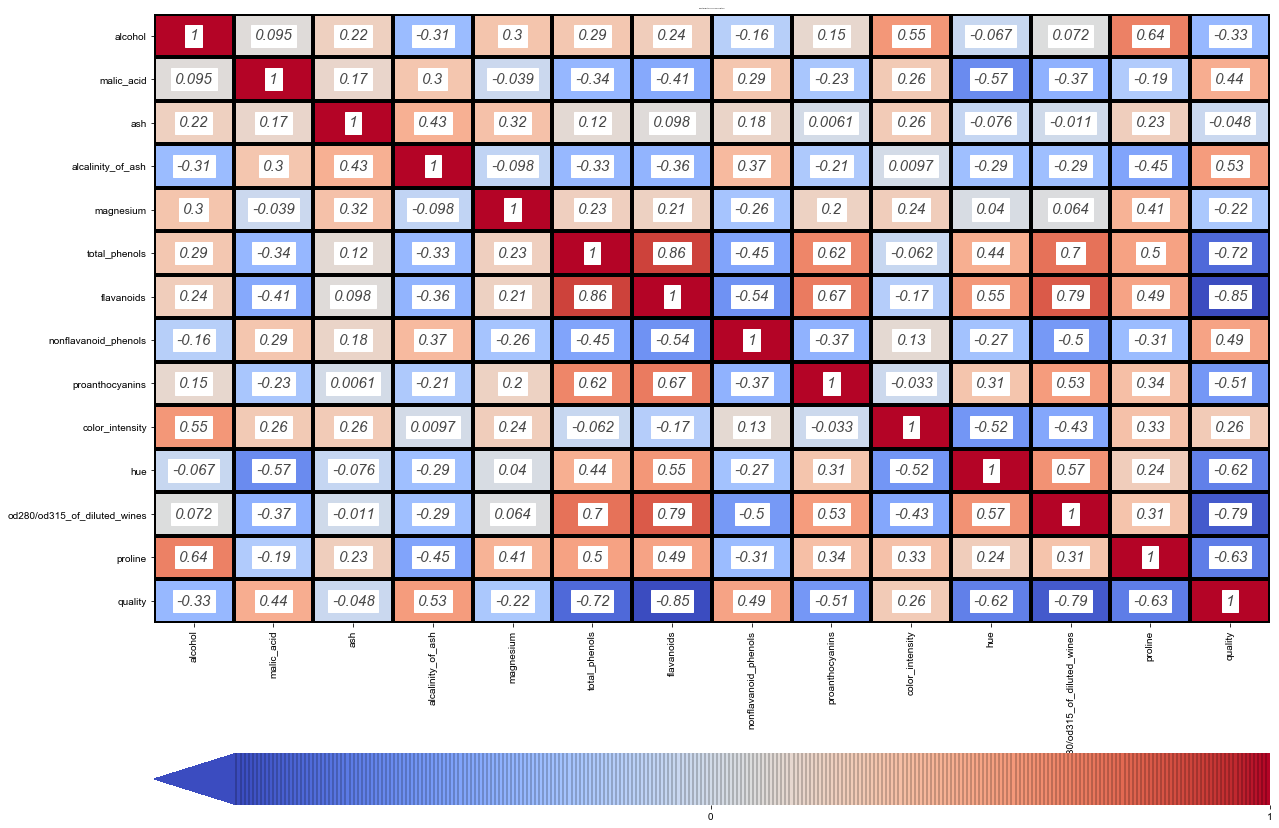

In [21]:
plt.figure(figsize=(20,16))
annot_kws={'fontsize': 15,'fontstyle':'italic','color':'k', 'alpha': 0.8,
'backgroundcolor':'w', 'verticalalignment':'center', 'rotation':'horizontal'}

cbar_kws={'orientation':'horizontal',
'shrink':1,
'extend':'min',
'extendfrac':0.08,
'ticks':np.arange(0,22),
'drawedges':True}

sns.heatmap(df.corr(), cmap='coolwarm', annot=True, annot_kws=annot_kws, cbar_kws=cbar_kws, linewidth=3, linecolor='k')
plt.title('heatmap to check correlation', fontsize=2)

sns.set(font_scale= 1.4)


alcohol, ash, magnesium and color intensity have a very low correlation with the target

# Preprocessing

In [44]:
X = df.drop(['quality'], axis = 1)
y = df['quality'] # Target

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Scaling the variables

In [45]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

In [46]:
X = min_max.fit_transform(X)
X[0]

array([0.84210526, 0.21260274, 0.53327338, 0.28197674, 0.87022901,
       0.62758621, 0.57383966, 0.28301887, 0.72586873, 0.46432375,
       0.48854962, 0.97069597, 0.56134094])

### Checking VIF Scores

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

h = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

pd.DataFrame(h, index= df.iloc[:,:-1].columns, columns = ['VIF Score'])

,VIF Score
alcohol,16.197688
malic_acid,4.660086
ash,15.372152
alcalinity_of_ash,14.411014
magnesium,7.802727
total_phenols,23.328404
flavanoids,26.847065
nonflavanoid_phenols,6.869544
proanthocyanins,10.659729
color_intensity,10.165380


# Model Making

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.15, 
                                                    random_state = 42)

## Adaboost Model

In [27]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor,GradientBoostingRegressor, GradientBoostingClassifier

In [28]:
??AdaBoostClassifier

In [29]:
ada=AdaBoostClassifier( n_estimators=80)


import time
print(time.time())


ada.fit(X_train,y_train)

print(time.time())

1603039817.5916793
1603039817.821896


In [30]:
ada.score(X_train,y_train)

0.9271523178807947

In [31]:
#Predict the response for test dataset

y_pred = ada.predict(X_test)
y_pred

array([1, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1])

In [34]:
# Accuracy Metrices

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

print("Accuracy Score Testing Data", accuracy_score(y_test,y_pred)*100,'\n')
print("Classification Report" ,'\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cm

Accuracy Score Testing Data 88.88888888888889 

Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.79      1.00      0.88        11
           2       1.00      0.86      0.92         7

    accuracy                           0.89        27
   macro avg       0.93      0.88      0.89        27
weighted avg       0.91      0.89      0.89        27



array([[ 7,  2,  0],
       [ 0, 11,  0],
       [ 0,  1,  6]], dtype=int64)

### A difference of 4% between test and train accuracy

In [36]:
### Creating a model after removing the variables with very low correlation with the target

In [38]:
X = df.drop(['alcohol', 'ash', 'magnesium', 'color_intensity','quality'], axis = 1)
y = df['quality'] # Target

X.head()

,malic_acid,alcalinity_of_ash,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,hue,od280/od315_of_diluted_wines,proline
0,1.71,15.6,2.80,3.06,0.28,2.29,1.04,3.92,1065.0
1,1.78,11.2,2.65,2.76,0.26,1.28,1.05,3.40,1050.0
2,2.36,18.6,2.80,3.24,0.30,2.81,1.03,3.17,1185.0
3,1.95,16.8,3.85,3.49,0.24,2.18,0.86,3.45,1480.0
4,2.59,21.0,2.80,2.69,0.39,1.82,1.04,2.93,735.0


In [39]:
X = min_max.fit_transform(X)
X[0]

array([0.21260274, 0.28197674, 0.62758621, 0.57383966, 0.28301887,
       0.72586873, 0.48854962, 0.97069597, 0.56134094])

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.15, 
                                                    random_state = 42)

In [41]:
ada2 = AdaBoostClassifier( n_estimators=80)

ada2.fit(X_train,y_train)

ada2.score(X_train,y_train)

0.8675496688741722

In [42]:
y_pred2 = ada2.predict(X_test)
y_pred2

array([1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 2, 2, 1])

In [43]:
print("Accuracy Score Testing Data", accuracy_score(y_test,y_pred2)*100,'\n')
print("Classification Report" ,'\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_test, y_pred2)
cm

Accuracy Score Testing Data 77.77777777777779 

Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.69      0.82      0.75        11
           2       0.71      0.71      0.71         7

    accuracy                           0.78        27
   macro avg       0.80      0.77      0.78        27
weighted avg       0.80      0.78      0.78        27



array([[7, 2, 0],
       [0, 9, 2],
       [0, 2, 5]], dtype=int64)

### Removing the variables has resulted in overfit. So it is better not to remove the variables

## GBM Model

In [49]:
gbm = GradientBoostingClassifier(verbose=True, n_estimators=80)

gbm.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           0.9041            3.12s
         2           0.7631            1.75s
         3           0.6489            1.30s
         4           0.5556            1.05s
         5           0.4785            0.86s
         6           0.4129            0.84s
         7           0.3576            0.73s
         8           0.3106            0.70s
         9           0.2705            0.66s
        10           0.2362            0.60s
        20           0.0600            0.35s
        30           0.0156            0.25s
        40           0.0041            0.19s
        50           0.0011            0.14s
        60           0.0003            0.09s
        70           0.0001            0.04s
        80           0.0000            0.00s


GradientBoostingClassifier(n_estimators=80, verbose=True)

In [50]:
gbm.score(X_train,y_train)

1.0

In [51]:
y_pred = gbm.predict(X_test)
y_pred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1])

In [52]:
print("Accuracy Score Testing Data", accuracy_score(y_test,y_pred2)*100,'\n')
print("Classification Report" ,'\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_test, y_pred2)
cm

Accuracy Score Testing Data 77.77777777777779 

Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.69      0.82      0.75        11
           2       0.71      0.71      0.71         7

    accuracy                           0.78        27
   macro avg       0.80      0.77      0.78        27
weighted avg       0.80      0.78      0.78        27



array([[7, 2, 0],
       [0, 9, 2],
       [0, 2, 5]], dtype=int64)

### Very severe case of underfitting

In [55]:
??GradientBoostingClassifier

## Using GridSearchCV for GBM

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {'loss': ['deviance','exponential'],
    'learning_rate' : [0.05, 0.1, 0.2, 0.5,1.0],
    'n_estimators' : [50,60,80,100],
     'max_depth':[3,4,5,6]       
             }

clf = GridSearchCV(GradientBoostingClassifier(),param_grid)


clf.fit(X_train, y_train)


C:\Users\aditi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aditi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aditi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\aditi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 248, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "C:\Users\aditi\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py", line 791, in __init__
    .format(self.__class__.__name__, n_classes))
ValueError: ExponentialLoss requires 2 classes; got 3 class(es)

  FitFailedWarning)
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\model_selection\_va

1.0

In [57]:
print(clf.best_score_)

print(clf.best_params_)

0.960215053763441
{'learning_rate': 1.0, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 80}


In [58]:
y_pred = clf.predict(X_test)

y_pred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1])

In [59]:
print("Accuracy Score Testing Data", accuracy_score(y_test,y_pred2)*100,'\n')
print("Classification Report" ,'\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_test, y_pred2)
cm

Accuracy Score Testing Data 77.77777777777779 

Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.69      0.82      0.75        11
           2       0.71      0.71      0.71         7

    accuracy                           0.78        27
   macro avg       0.80      0.77      0.78        27
weighted avg       0.80      0.78      0.78        27



array([[7, 2, 0],
       [0, 9, 2],
       [0, 2, 5]], dtype=int64)

### It is still being underfitted. It can be due to small quantity of available data.